<a href="https://colab.research.google.com/github/adrian-str/Hands-on_ML/blob/main/Chapter_9_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
data=fetch_olivetti_faces()

In [ ]:
y=data['target']
X=data['data']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
splits=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
splits.get_n_splits(X,y)

1

In [ ]:
for train_index, test_index in splits.split(X,y):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [ ]:
splits.get_n_splits(X_train,y_train)

1

In [ ]:
for train_index, test_index in splits.split(X_train,y_train):
  X_train,X_val=X[train_index],X[test_index]
  y_train,y_val=y[train_index],y[test_index]

In [ ]:
from sklearn.cluster import KMeans
# km=KMeans()
# km.fit(X)
km.inertia_

19798.932056062436

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.99)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
X_val_pca=pca.transform(X_val)

In [ ]:
k_means_ks=[KMeans(n_clusters=k,random_state=42).fit(X_train_pca) for k in range(5,150,5)]

In [ ]:
inertias = [model.inertia_ for model in k_means_ks]

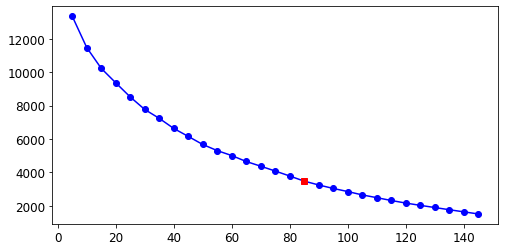

In [ ]:
best_inertia=inertias[best_idx]
plt.figure(figsize=(8,4))
plt.plot(range(5,150,5),inertias,"bo-")
plt.plot(best_k,best_inertia,"rs")

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores=[silhouette_score(X_train_pca,model.labels_) for model in k_means_ks]

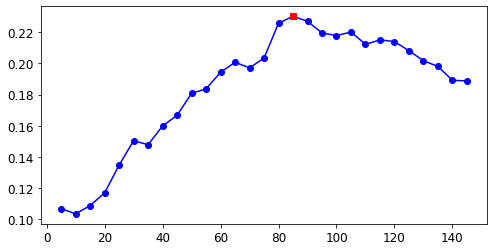

In [ ]:
best_idx=np.argmax(silhouette_scores)
k_range=range(5,150,5)
best_k=k_range[best_idx]
best_score=silhouette_scores[best_idx]
plt.figure(figsize=(8,4))
plt.plot(range(5,150,5),silhouette_scores,"bo-")
plt.plot(best_k,best_score,"rs")

In [ ]:
best_kmeans=k_means_ks[16]

Cluster 0


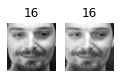

Cluster 1


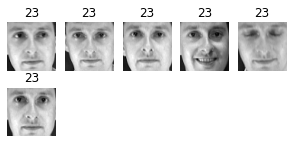

Cluster 2


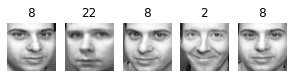

Cluster 3


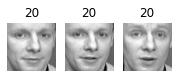

Cluster 4


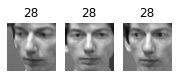

Cluster 5


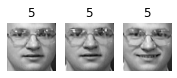

Cluster 6


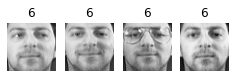

Cluster 7


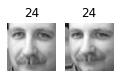

Cluster 8


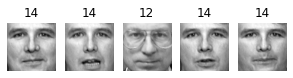

Cluster 9


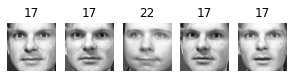

Cluster 10


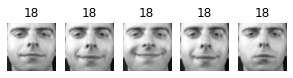

Cluster 11


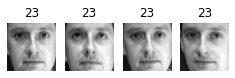

Cluster 12


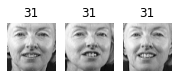

Cluster 13


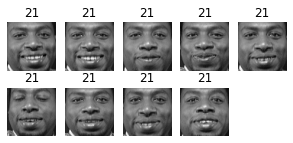

Cluster 14


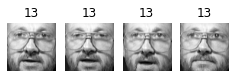

Cluster 15


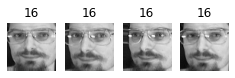

Cluster 16


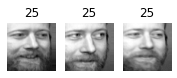

Cluster 17


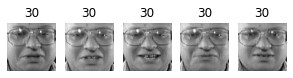

Cluster 18


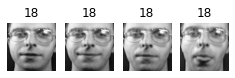

Cluster 19


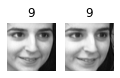

Cluster 20


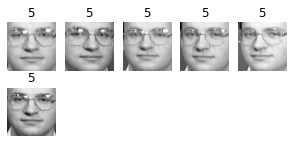

Cluster 21


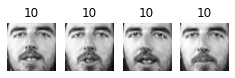

Cluster 22


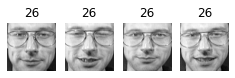

Cluster 23


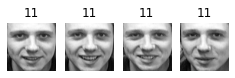

Cluster 24


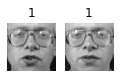

Cluster 25


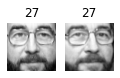

Cluster 26


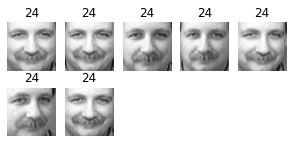

Cluster 27


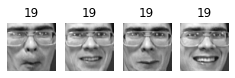

Cluster 28


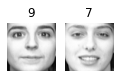

Cluster 29


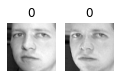

Cluster 30


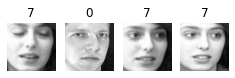

Cluster 31


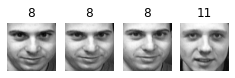

Cluster 32


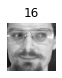

Cluster 33


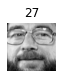

Cluster 34


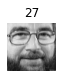

Cluster 35


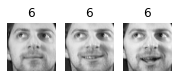

Cluster 36


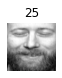

Cluster 37


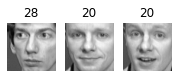

Cluster 38


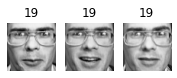

Cluster 39


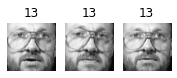

Cluster 40


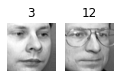

Cluster 41


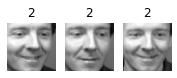

Cluster 42


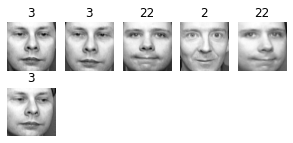

Cluster 43


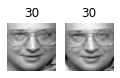

Cluster 44


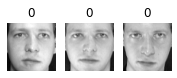

Cluster 45


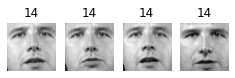

Cluster 46


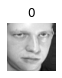

Cluster 47


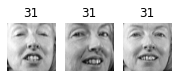

Cluster 48


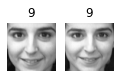

Cluster 49


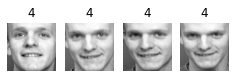

Cluster 50


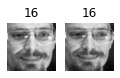

Cluster 51


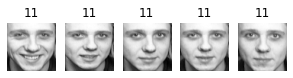

Cluster 52


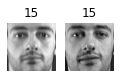

Cluster 53


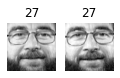

Cluster 54


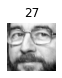

Cluster 55


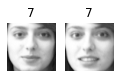

Cluster 56


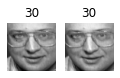

Cluster 57


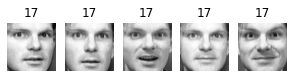

Cluster 58


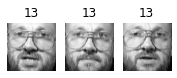

Cluster 59


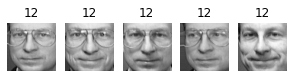

Cluster 60


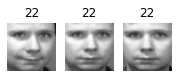

Cluster 61


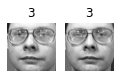

Cluster 62


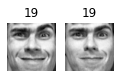

Cluster 63


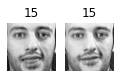

Cluster 64


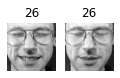

Cluster 65


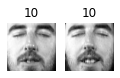

Cluster 66


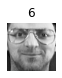

Cluster 67


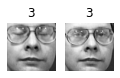

Cluster 68


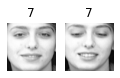

Cluster 69


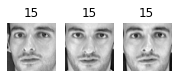

Cluster 70


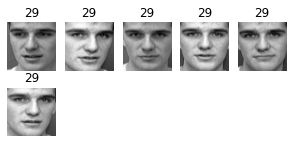

Cluster 71


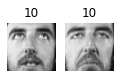

Cluster 72


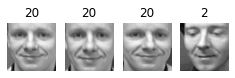

Cluster 73


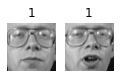

Cluster 74


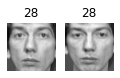

Cluster 75


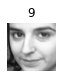

Cluster 76


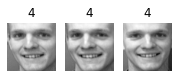

Cluster 77


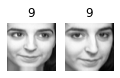

Cluster 78


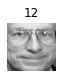

Cluster 79


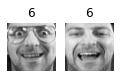

Cluster 80


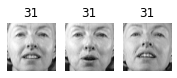

Cluster 81


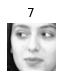

Cluster 82


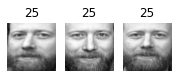

Cluster 83


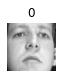

Cluster 84


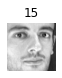

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_kmeans.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

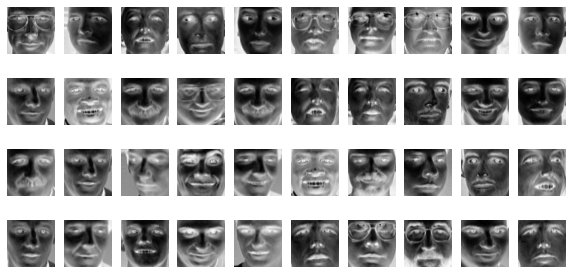

In [ ]:
k=40
plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_train[:40]):
    plt.subplot(k // 10, 10,index+1)
    plt.imshow(X_representative_digit.reshape(64,64), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_jobs=-1)

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rf_clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred)

0.9375

In [ ]:
X_train_red=best_kmeans.fit_transform(X_train)
X_val_red=best_kmeans.transform(X_val)
X_test_red=best_kmeans.transform(X_test)

In [ ]:
rf_clf.fit(X_train_red,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rf_clf.predict(X_val_red)
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred)

0.828125

In [ ]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('kmeans',KMeans(n_clusters=50)),
                   ('rf_clf',RandomForestClassifier(n_jobs=-1))])

In [ ]:
param_grid=dict(kmeans__n_clusters=range(100,124,3))
param_grid

{'kmeans__n_clusters': range(100, 124, 3)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_clf=GridSearchCV(pipeline,param_grid,cv=3,verbose=2,n_jobs=-1)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('rf_clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gi

In [ ]:
grid_clf.best_estimator_

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=112, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('rf_clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=

In [ ]:
y_pred=grid_clf.best_estimator_.predict(X_val)

accuracy_score(y_val,y_pred)

0.828125

In [ ]:
best_kmeans.transform(X_train).shape

(256, 85)

In [ ]:
X_train_red.shape

(256, 85)

In [ ]:
X_train_ext=np.concatenate((X_train,X_train_red),axis=1)
X_val_ext=np.concatenate((X_val,X_val_red),axis=1)
X_test_ext=np.concatenate((X_test,X_test_red),axis=1)

In [ ]:
grid_clf.fit(X_train_ext,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('rf_clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gi

In [ ]:
y_pred=grid_clf.best_estimator_.predict(X_val_ext)
accuracy_score(y_val,y_pred)

0.703125

In [ ]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=40,random_state=42)
gm.fit(X_train_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
new_faces,y_new=gm.sample(5)
new_faces=pca.inverse_transform(new_faces)

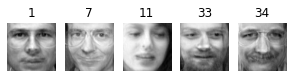

In [ ]:
plot_faces(faces=new_faces.reshape(-1,64,64),labels=y_new)

In [ ]:
rotated=(np.transpose(X_train[:4].reshape(-1,64,64),axes=[0,2,1])).reshape(-1,64*64)
flipped=(X_train[:3].reshape(-1,64,64)[:,::-1]).reshape(-1,64*64)
darkened=X_train[:3].copy()
darkened[:,1:-1]*=0.3
darkened=darkened.reshape(-1,64*64)
bad_faces=np.r_[rotated,flipped,darkened]

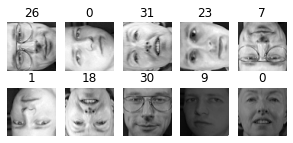

In [ ]:
plot_faces(bad_faces,y_train)

In [ ]:
bad_faces_pca=pca.transform(bad_faces)
gm.score_samples(bad_faces_pca)

array([-3.47191403e+07, -7.36449492e+07, -2.79890016e+07, -3.27247506e+07,
       -4.53892903e+07, -4.05780525e+07, -3.77702636e+07, -1.00951915e+08,
       -1.11529258e+08, -9.64288503e+07])

In [ ]:
gm.score_samples(X_train_pca[:10])

array([ 987.51506009, 1080.07834615, 1042.15824235, 1035.8262555 ,
       1080.07834612, 1073.106541  , 1073.93641063, 1066.35893693,
       1049.37655903, 1007.22116126])

In [ ]:
pca2=PCA(n_components=0.99)
X_red=pca2.fit_transform(X)
X_rec=pca2.inverse_transform(X_red)
pca2.n_components_

260

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_rec)

0.00019257102

In [ ]:
def reconstruction_error(pca,X):
  X_pca=pca.transform(X)
  X_reconstructed=pca.inverse_transform(X_pca)
  mse=np.square(X_reconstructed-X).mean(axis=-1)
  return mse

In [ ]:
reconstruction_error(pca,X_train).mean()

0.0001842172

In [ ]:
reconstruction_error(pca,bad_faces).mean()

0.00594568

In [ ]:
bad_rec=pca.inverse_transform(bad_faces_pca)

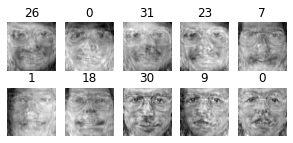

In [ ]:
plot_faces(bad_rec,y_train)